# 스타트업 성공 예측
##### 과목명 : 인공지능
##### 분반 : 02
##### 길민준(2022211736)
##### 제출일 : 2025-06-04

# 1 요약
## 1.1 연구 배경 및 목적
스타트업은 혁신과 경제 성장의 핵심 동력이나, 실패 확률이 높아 투자 의사결정이 어려움 <br>
스타트업의 성공 가능성을 사전에 예측하려는
투자자와 정책입안자의 수요가 증가하고 있음
<br>
본 연구는 Crunchbase 데이터를 활용하여, 스타트업의 상태(status)를 다중 분류하고자 함
모델은 Operating, Acquired, Closed 세 가지 상태를 예측하며,
이 중 Acquired 상태를 투자 회수 기준의 성공으로 간주하여
성과 해석은 이진 분류 관점에서 진행함

## 1.2 데이터 및 연구 방법 요약
Kaggle의 Crunchbase 스타트업 투자 데이터와 외교부 국가표준코드 데이터를 활용함
<br>
결측치 처리, 범주형 변수 인코딩, 주요 변수(산업군, 국가, 설립연도 등) 선택을 포함한 전처리 수행
<br>
status 컬럼에 포함된 세 가지 상태(Operating, Acquired, Closed)를 분류 대상으로 설정하여 다중 분류 모델을 구성함
<br>
모델은 세 가지 상태를 예측하며, 성과 해석은 벤처 캐피탈의 투자 회수 관점에서 이진 분류 기준으로 진행함
<br>
Acquired 상태는 성공(투자 회수 완료)으로 간주하고, Operating 및 Closed 상태는 성공하지 않은 상태(미회수 또는 종료)로 해석함
<br>
초기 모델로 의사결정나무(DecisionTreeClassifier)를 사용하고, 이후 RandomForestClassifier 및 XGBoostClassifier로 성능을 비교함
<br>
클래스 불균형 문제를 완화하기 위해 SMOTE(Synthetic Minority Oversampling Technique)를 적용함

## 1.3 연구 결과 요약
초기 모델로 의사결정나무(DecisionTreeClassifier)를 적용한 결과, 테스트 데이터 기준 약 86.7%의 정확도(accuracy)를 기록함
<br>
하지만 이 모델은 세 가지 상태 중 Operating 클래스에만 편중된 예측 결과를 보였고, Acquired 및 Closed 클래스의 F1-score는 매우 낮게 나타남
<br>
이는 학습 데이터의 클래스 불균형 때문으로, 전체적인 모델의 실용성과 일반화 가능성에 제약을 주는 요인이었음
<br>
이를 보완하기 위해 SMOTE(Synthetic Minority Oversampling Technique)를 적용하여 소수 클래스 데이터를 증강함
<br>
이후 RandomForestClassifier 및 XGBoostClassifier 모델을 추가로 학습시켜 예측 성능을 비교함
<br>
성능 평가는 단순 정확도 외에도, 클래스별 예측 성능을 균형 있게 반영하기 위해 F1-score를 함께 사용함
<br>
그 결과, RandomForest와 XGBoost 모델은 다중 클래스 간 예측력 균형에서 더 나은 성능을 보이며 단일 모델의 한계를 보완함

# 서론

## 2.1 연구 목표 및 문제
스타트업은 높은 성장 가능성과 함께 실패 확률도 높은 고위험 고수익 구조의 비즈니스임
<br>
벤처 캐피탈은 막대한 자금을 소수의 스타트업에 집중 투자하므로, 사전에 성공 가능성을 예측할 수 있는 모델의 수요가 높음
<br>
본 프로젝트는 Crunchbase 스타트업 데이터를 활용하여 머신러닝 기반의 상태 예측 모델을 구축하고자 함
<br>
예측 대상 클래스는 Operating, Closed, Acquired의 세 가지이며, 이는 다중 분류 문제(multiclass classification)로 정의됨
<br>
단, 모델의 성과 해석은 벤처 캐피탈의 투자 회수 관점에서 진행하며,
Acquired 상태를 성공(1), Operating 및 Closed 상태를 실패(0)로 간주하는 이진 분류 기준으로 평가함

## 2.2 기존 연구 또는 유사 사례
과거 스타트업 분석 연구들은 정성적 접근(창업자의 특성, 시장 분석 등)에 집중되어 있었음
<br>
최근 Kaggle 등에서 제공하는 공개 데이터를 바탕으로, 정량적 모델링 및 성능 비교 사례들이 일부 등장하고 있음
<br>
그러나 대부분의 연구는 생존(Operating)/사망(Closed)을 구분하는 이진 분류(binary classification) 문제에 초점을 두었으며,
Acquired 상태를 별도로 분석하거나 투자 회수 관점에서 해석한 사례는 드뭄

## 2.3 본 연구 또는 접근방법의 차별성, 독창성
기존 연구들이 단순한 이진 분류(생존/폐업)에 집중한 것과 달리, 본 연구는 Operating, Acquired, Closed 세 가지 상태를 모두 고려한 다중 분류 모델을 설계함
<br>
분류 모델의 예측 결과는 벤처 캐피탈 투자 회수 관점에서 해석되며, Acquired 상태를 성공, Operating 및 Closed 상태를 실패 또는 미회수로 간주하여 분석함
<br>
산업군, 본사 위치, 투자자 수 등의 범주형 변수 정리와 결측치 처리, 설립일 등의 날짜 가공 등 데이터 정리와 구성 작업을 체계적으로 수행함
<br>
데이터 불균형 문제를 해결하기 위해 SMOTE(Synthetic Minority Oversampling Technique)를 적용하여 소수 클래스(특히 Acquired, Closed)의 학습 데이터 균형을 확보함
<br>
초기 모델로 의사결정나무(DecisionTreeClassifier)를 활용하였고, 이후 RandomForestClassifier와 XGBoostClassifier를 적용하여 성능을 비교 분석함
<br>
단순 정확도 외에도 클래스 간 예측력 균형을 평가하기 위해 F1-score 등 다각도의 성능 지표를 활용하였음

# 3. 연구 방법

## 3.1 데이터 소개 및 수집 방법
본 연구에서는 Crunchbase 기반의 스타트업 투자 데이터를 사용함
<br>
해당 데이터는 Kaggle 공개 데이터셋에서 제공된 investments_VC.csv를 바탕으로 구성됨
<br>
이 데이터는 초기 단계 스타트업부터 포춘 1000대 기업까지 다양한 기업 정보를 제공하는 선도 플랫폼인 Crunchbase에서 수집된 것
<br>
국가 및 대륙 정보는 공공데이터포털에서 제공된 외교부 국가표준코드(외교부_국가표준코드_20250102.csv)를 활용해 보완함
<br>
참고 코드: Predicting Startup Success by pball01
<br>
Crunchbase 스타트업 데이터의 주요 특징은 다음과 같음
<br>
- 총 39개의 변수(열)로 구성됨
- 총 54294개의 데이터로 구성됨
- 각 행은 단일 기업의 단일 투자 이력을 의미함
- 종속 변수(status)는 Operating, Acquired, Closed 세 가지 상태로 구분됨
<br>

전체 변수 목록은 부록에 포함함
<br>
주요 변수는 EDA 및 초기 변수 평가, 특성 엔지니어링, 변수 변환 및 인코딩, 상관관계 분석, 모델 기반 특성 중요도 분석을 통해 데이터의 특징, 목표 변수와의 관련성, 통계적 유의미성, 모델의 예측 기여도 등을 종합적으로 평가하여 선정함

| 변수명               | 변수 설명       | 자료 설명                                                                 |
|---------------------|----------------|--------------------------------------------------------------------------|
| `permalink`         | 회사 고유 링크  | 고유 식별자 역할을 하는 회사 URL                                         |
| `name`              | 회사명          | 스타트업의 이름                                                           |
| `category_list`     | 산업군 목록     | software, biotech 등 복수 산업군 포함                                     |
| `market`            | 주요 시장분류   | 해당 기업의 핵심 시장                                                    |
| `funding_total_usd` | 총 투자금액     | 누적 투자 유치 금액 (USD 기준)                                           |
| `funding_rounds`    | 펀딩 횟수       | 기업이 받은 총 투자 라운드 수                                            |
| `country_code`      | 국가 코드       | ISO 3166-1 alpha-3 형식                                                   |
| `state_code`        | 미국 주 코드    | 미국 내 기업의 지역 정보                                                 |
| `status`            | 기업 상태       | Operating / Acquired / Closed (분류 대상 변수)                           |

## 3.2 분석 방법 및 절차
분석 목적은 스타트업의 기업 속성 데이터를 기반으로 status(Operating, Acquired, Closed)를 예측하는 분류 모델을 구축하는 것임
<br>
전체 분석 과정은 데이터 전처리 → 특성(변수) 정제 → 모델 학습 → 성능 평가 순으로 구성됨
<br>
분석 과정에서 scikit-learn 기반의 주요 ML 기법과 전처리 도구가 사용됨
<br>
분석 절차는 아래와 같음

### 3.2.1 데이터 전처리
status, category_list, country_code, funding_total_usd 등 주요 변수 기준으로 결측치 제거
<br>
주요 변수는 상관관계 분석 및 모델 기반 특성 중요도에 따름
<br>
분석에 활용되지 않으며, 예측 성능에 기여하지 않는 식별자(ID성) 변수(homepage_url, permalink, region, city 등)는 제거함
<br>
→ 모델 학습에 직접적으로 사용되지 않고, 기업 식별 외 의미가 없기 때문에 제거함
<br>
문자열로 되어 있는 금액(funding_total_usd)은 숫자형으로 변환

### 3.2.2 범주형 변수 인코딩
country_code, state_code, category_list, market, funding_round_type 등은LabelEncoder를 통해 숫자형으로 변환
<br>
status는 타겟 변수로 사용되며, 다음과 같이 라벨 인코딩:
<br>
- Closed → 0
<br>
- Operating → 1
<br>
- Acquired → 2
<br>

※ 일반적으로 타겟 변수에 숫자 인코딩을 적용하면 순서를 의미한다고 판단할 수 있으나, 본 연구에서는 트리 기반 모델을 사용하므로 라벨 인코딩 순서가 모델 성능에 영향을 주지 않음

### 3.2.3 수치형 변수 정제
funding_total_usd를 포함한 투자 금액 변수들은 값의 분포가 심하게 왜곡되어 있었으며,  
이를 기반으로 생성한 total_investment 변수는 구간별로 나누어 범주형 변수로 변환함

#### 연도별 회사 설립 수

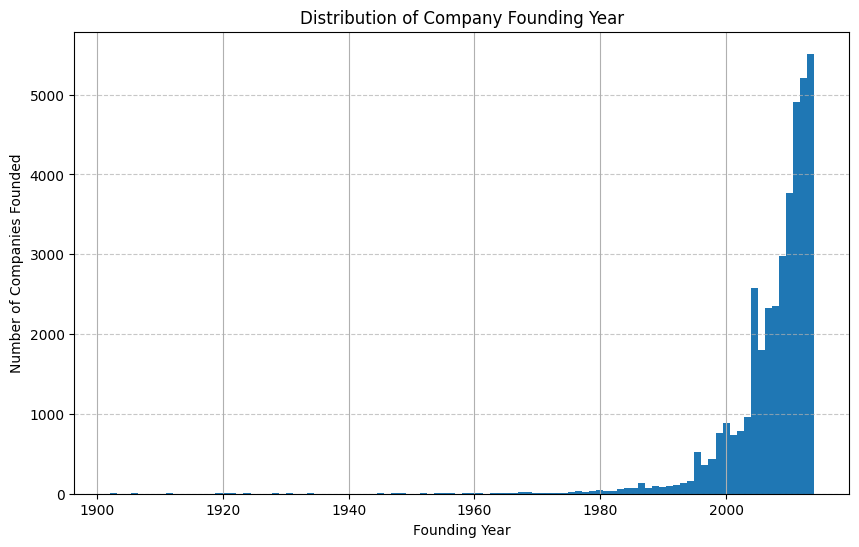

#### 타겟 변수 분포

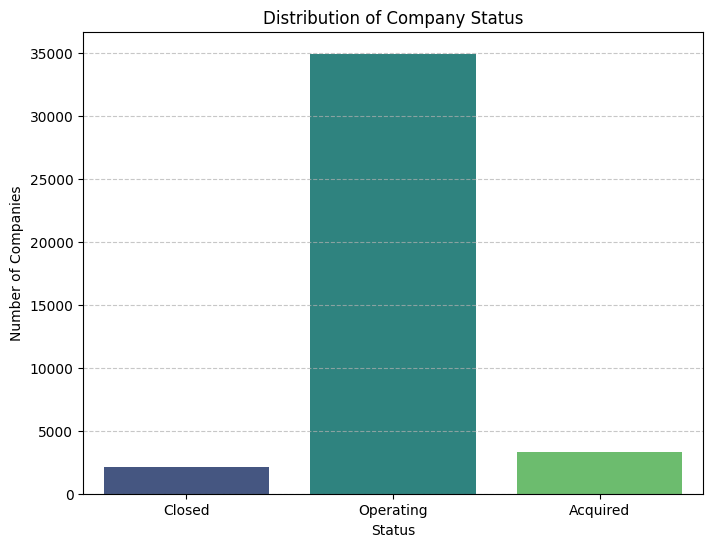

In [ ]:
# 여기 밑에 타겟변수 시각화 자료 위치

### 3.2.4 데이터 분할
전체 데이터를 train_test_split을 사용하여 학습용(70%)과 테스트용(30%)으로 분할
<br>
이때 클래스 비율을 유지하는 stratify 옵션은 적용하지 않음
<br>
이는 데이터 분석 초기에 단순 무작위 분할을 통해 모델의 전반적인 경향성을 파악하는 데 목적이 있었기 때문임
<br>
또한 이후 SMOTE 기반의 오버샘플링을 적용하여 클래스 불균형 문제를 보완함으로써 stratify 미적용으로 인한 영향은 최소화함

## 3.3 사용한 AI 모델 및 훈련 과정
본 연구에서는 다중 클래스 분류 문제로 정의된 기업 상태(status) 예측을 위해 트리 기반 머신러닝 모델을 적용함
<br>
초기 모델로는 scikit-learn의 DecisionTreeClassifier를 사용하였으며, 선택 기준은 해석 가능성, 구현 용이성, 과적합 방지 설정의 유연성 등을 포함함
<br>
추가적으로 성능 향상을 위해 RandomForestClassifier와 XGBoostClassifier를 학습하였으며, 이들은 각각 앙상블 기반의 안정성과 부스팅 기반의 예측 정밀도를 반영하도록 구성함
<br>
모델 평가는 정확도(Accuracy)뿐 아니라 클래스 간 예측 성능 차이를 고려한 F1-score 지표를 함께 활용함
<br>
클래스 불균형 문제에 대응하기 위해 SMOTE(Synthetic Minority Over-sampling Technique)를 도입하였으며, 자세한 학습 흐름과 성능 비교 과정은 4.1절에 서술함
모델별 하이퍼파라미터 설정은 부록에 정리되어 있음

### 훈련 과정



| 단계           | 내용                                                                                          | 비고                                     |
|----------------|-----------------------------------------------------------------------------------------------|------------------------------------------|
| 모델 선택      | DecisionTreeClassifier, RandomForestClassifier, XGBoostClassifier로 학습 | scikit-learn, xgboost 사용                |
| 하이퍼파라미터 | Decision Tree는 `entropy`, `max_depth=5` 등 설정                                              | 과적합 방지 목적                         |
| 데이터 분할    | `train_test_split`으로 학습/테스트 70:30 비율로 분할. stratify는 적용하지 않음                  | 단순 무작위 분할, SMOTE로 보완           |
| 모델 학습      | `X_train`, `Y_train` 데이터를 기반으로 모델 훈련                                               | 학습 비율 70%                            |
| 예측 수행      | `X_test`에 대해 상태(status) 예측 수행                                                        | 테스트 비율 30%                          |
| 성능 평가      | 정확도, Precision, Recall, F1-score 등 다면적 평가 지표 사용                                   | 다중 클래스 평가 지표 활용               |
| 결과 해석      | Classification Report 기준, Operating F1-score는 0.77, Acquired는 0.22, Closed는 0.13 수준         | 클래스 불균형 문제를 시각적으로 확인 가능 |
| 보완 조치      | SMOTE로 소수 클래스 증강, XGBoost 학습 전 범주형 변수 수치형으로 변환                      | 불균형 대응 및 오류 방지                 |

DecisionTreeClassifier 기반 초기 모델은 단순하고 해석이 쉬운 장점이 있지만, 클래스 불균형 문제로 인해 소수 클래스 예측력이 미흡했음<br>
이 문제를 해결하기 위해 SMOTE를 도입하여 Closed 및 Acquired 클래스 데이터를 증강<br>
SMOTE는 기존 소수 클래스 인스턴스를 KNN 방식으로 결합하여 새로운 샘플을 생성함으로써 단순 복제보다 더 나은 일반화 성능을 기대할 수 있음<br>
SMOTE 적용 후, 성능 안정성 확보를 위해 Random Forest(다수의 트리 앙상블 기반)와 XGBoost(gradient boosting 기반 고성능 모델)를 학습함<br>
두 모델 모두 클래스 간 균형 예측 성능 향상을 목적으로 사용되었으며, 같은 훈련/검증 방식으로 성능 비교가 가능함<br>
학습 및 평가 과정은 기존과 동일한 데이터 분할(70:30) 방식으로 수행함<br>
XGBoost 학습 전, 문자열 기반 범주형 변수는 수치형으로 직접 변환하여 오류를 방지함<br>


#### SMOTE 적용 전후 클래스 분포 비교

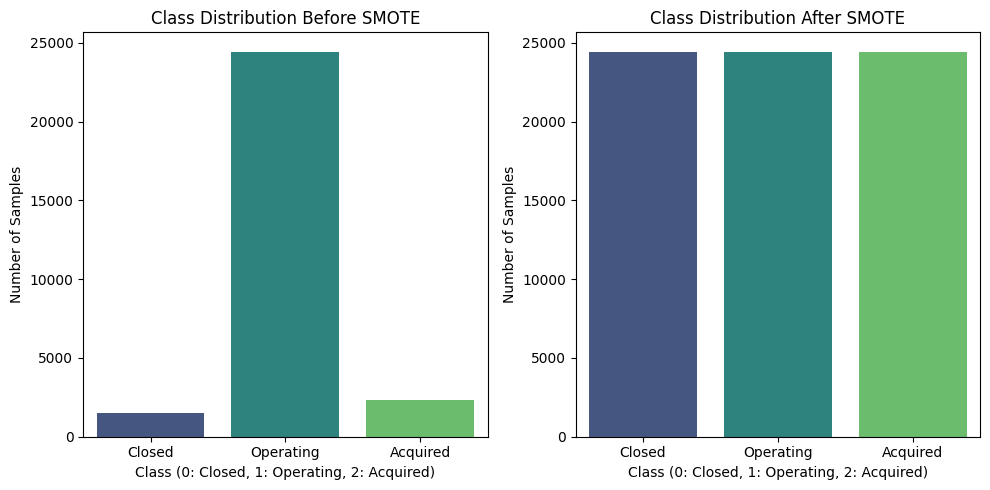

# 4. 실험 및 결과

## 4.1 실험 과정 소개
전처리 및 피처 엔지니어링을 마친 후, 전체 데이터를 학습용(70%)과 테스트용(30%)으로 무작위 분할함
<br>
초기 모델로는 Decision Tree를 활용하여 기업 상태(status)를 분류함
<br>
예측 결과는 정확도(accuracy)를 기준으로 1차 평가하고, classification_report를 통해 정밀도(precision), 재현율(recall), F1-score 등 다중 클래스 성능을 상세히 분석함
<br>
분류 대상 클래스는 Operating, Closed, Acquired의 세 가지이며, 클래스 불균형 문제 해소를 위해 SMOTE 기법을 적용함
<br>
데이터 증강 이후, Random Forest와 XGBoost 모델을 추가로 학습함
<br>
각 모델은 다중 클래스 분류에 적합하게 구성하였으며, 테스트셋은 동일하게 유지하여 모델 간 성능을 공정하게 비교함
<br>

모델 학습에 사용한 파라미터는 모두 부록에 있음

## 4.2 성능 비교



테스트 데이터에 대한 최종 모델 성능은 다음과 같음

| 모델            | 클래스     | 정밀도 (Precision) | 재현율 (Recall) | F1 점수 (F1-score) | 지원 개수 (Support) |
|-----------------|------------|--------------------|------------------|--------------------|----------------------|
| Decision Tree   | Closed     | 0.00               | 0.00             | 0.00               | 411                  |
|                 | Operating  | 0.87               | 1.00             | 0.93               | 7,013                |
|                 | Acquired   | 0.00               | 0.00             | 0.00               | 666                  |
| Random Forest   | Closed     | 0.10               | 0.01             | 0.01               | 411                  |
|                 | Operating  | 0.87               | 0.98             | 0.92               | 7,013                |
|                 | Acquired   | 0.24               | 0.06             | 0.10               | 666                  |
| XGBoost         | Closed     | 0.09               | 0.32             | 0.14               | 640                  |
|                 | Operating  | 0.89               | 0.72             | 0.80               | 10,499               |
|                 | Acquired   | 0.21               | 0.31             | 0.25               | 996                  |

전체 정확도: Decision Tree: 0.87, Random Forest: 0.85, XGBoost: 0.67

Decision Tree:
<br>
Operating 클래스에서 가장 높은 F1-score(0.93)를 기록했으나, Closed와 Acquired 클래스는 전혀 예측하지 못하며 클래스 불균형에 매우 취약함
<br>
특히, 투자 회수 관점의 성공(Acquired) 및 실패(Operating/Closed) 예측 성능이 전무했음
<br>
정확도는 0.87로 수치상 높았지만, 이는 대부분 Operating 클래스 예측 때문

Random Forest:
<br>
Operating 클래스에서 Decision Tree와 유사한 높은 F1-score(0.92)를 유지
<br>
투자 회수 성공으로 간주하는 Acquired 클래스의 F1-score는 0.10으로 소폭 개선되었으나, 실패로 간주하는 Closed 클래스 예측은 여전히 미흡했음
<br>
전체 정확도는 0.85로 소폭 감소

XGBoost:
<br>
Closed 클래스의 F1-score는 0.14, Acquired 클래스는 0.25로 Decision Tree 및 Random Forest 대비 뚜렷한 개선을 보였음
<br>
Operating 클래스의 F1-score는 0.80으로 다소 감소했지만, 전반적으로 클래스 간 예측 성능의 균형을 확보했음
<br>
특히, 소수 클래스인 Closed와 Acquired에 대한 예측력이 향상되어 이진 분류 관점에서의 실패 및 성공 예측 가능성을 높였음
<br>
전체 정확도는 0.67로 가장 낮았지만, 이는 클래스 불균형 상황에서 소수 클래스 예측 성능 향상에 집중한 결과로 해석할 수 있음

결론:
<br>
정확도 측면에서는 Decision Tree > Random Forest > XGBoost 순이었으나, 클래스 불균형 대응 및 균형 잡힌 예측 성능은 XGBoost > Random Forest > Decision Tree 순으로 나타남
<br>
특히 XGBoost는 투자 회수 성공(Acquired) 예측력 향상에 가장 효과적인 모델이었음

#### 모델별 성능 비교

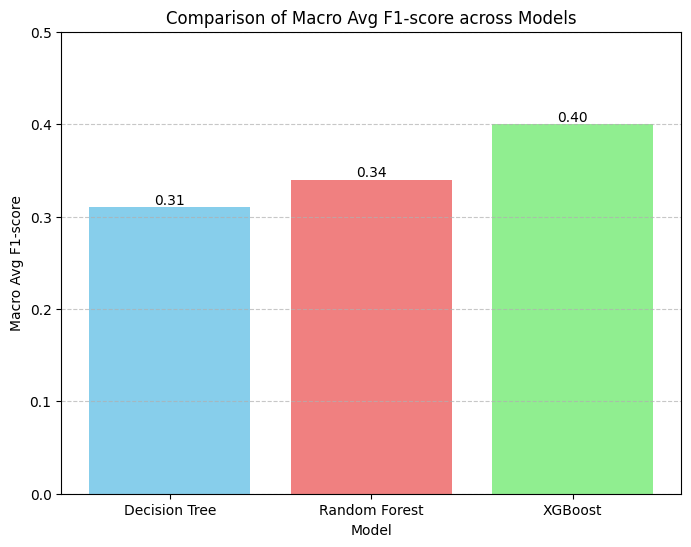

# 5. 결론
## 5.1 실험 결과 분석 및 평가
초기 Decision Tree 모델은 전체 정확도는 높았지만 대부분 Operating 클래스만 예측함
<br>
Closed와 Acquired 클래스는 거의 예측되지 않아 클래스 불균형 문제가 드러남
<br>
이를 해결하기 위해 SMOTE로 소수 클래스 데이터를 증강시킴
<br>
이후 Random Forest와 XGBoost 모델을 적용하여 성능을 비교함
<br>
XGBoost 모델은 F1-score와 예측 균형 면에서 가장 나은 성과를 보임
<br>
모델 다양화를 통해 단일 모델의 한계를 보완하고 예측의 안정성을 높일 수 있었으며, 특히 투자 회수 성공(Acquired) 예측이라는 이진 분류 관점에서 XGBoost 모델이 가장 유의미한 개선을 보임
<br>

## 5.2 주요 연구 결과 요약
Crunchbase 데이터를 기반으로, 기업 상태(status)를 예측하는 분류 모델을 구축함<br>
전처리, 라벨 인코딩, 정규화, 트레인-테스트 분할을 통해 분석 파이프라인을 구성함<br>
DecisionTreeClassifier를 활용하여 비교적 해석 가능한 모델을 구성하고, 학습 및 예측 수행
Operating 클래스 중심으로 높은 정확도를 보였으나, 타 클래스는 예측에 실패하며 클래스 불균형 문제를 확인함<br>
전체적으로 클래스 불균형 문제를 반영한 성능 평가의 중요성을 확인함<br>
클래스 불균형 문제를 해결하기 위해 SMOTE를 활용한 오버샘플링을 적용함<br>
기존 DecisionTree 외에도 Random Forest, XGBoost를 학습시켜 성능을 비교함<br>
XGBoost는 모든 클래스에서 균형 잡힌 성능을 보이며, Macro F1-score 기준으로 가장 우수한 결과를 보임<br>
다양한 분류 모델을 통해 문제 해결 방향성과 실용 가능성을 동시에 확보함<br>

## 5.3 연구의 강점과 한계점

### 강점
공개된 스타트업 데이터셋을 기반으로 실용적 예측 문제를 정식화함
<br>
모델 해석이 용이한 결정 트리 기반 접근을 통해 학습 결과 분석이 가능함
<br>
과적합 문제를 최소화하며 기본적인 분류 모델의 성능을 검증함
<br>
단일 모델이 아닌 여러 모델(Random Forest, XGBoost) 비교를 통해 예측 결과 신뢰도를 향상함
<br>
SMOTE를 적용하여 데이터 불균형 문제에 대응하고자 시도함
<br>
특히 단순 복제가 아닌 새로운 데이터 생성을 통한 학습 다양성 확보로, 소수 클래스 학습 효과 향상을 기대함
<br>
XGBoost 모델은 기존 모델 대비 Closed 및 Acquired 클래스에 대해 개선된 예측 성능을 보였으며, 특히 Acquired 클래스 예측력 향상에 효과적임을 확인함
<br>

### 한계점
클래스 불균형 문제가 모델 학습 및 예측 성능에 여전히 직접적인 영향을 미쳤으며, 특히 소수 클래스(Closed, Acquired)의 성능이 전체 정확도에 비해 낮게 나타남
<br>
SMOTE를 적용했음에도 불구하고 Closed 클래스에 대한 예측 성능은 여전히 제한적임
<br>
본 연구에서는 다양한 모델을 비교했지만, 심층적인 앙상블 기법이나 스택킹 등 고급 기법은 적용되지 않았음
<br>
SMOTE 적용 이후에도 Closed 클래스 예측 성능은 여전히 제한적임
<br>
변수 간 상호작용이나 중요도 분석이 충분히 포함되지 않아 인사이트 도출 및 모델 설명력에 한계가 있음
<br>
Closed 클래스 예측 성능 제한에 대한 구체적인 추가 해결 방안 제시가 미흡함

## 5.4 향후 연구 방향 및 기대 효과
다중 분류 모델의 결과를 투자 회수 성공/실패 관점에서 더 효과적으로 활용하기 위해, 필요에 따라 Closed와 Acquired 클래스를 분리하거나 단계적으로 분류하는 모델 구조를 탐색해보기

모델의 예측 결과뿐만 아니라, 어떤 변수들이 스타트업의 상태 예측에 중요한 영향을 미치는지 변수 중요도 분석(예: SHAP)을 통해 파악하고 시각화하여 투자자나 정책 입안자에게 실질적인 인사이트를 제공하는 모델로 발전시키기

현재의 다중 분류 문제 설정을 넘어서, Acquired를 성공으로, Operating 및 Closed를 실패로 간주하는 명확한 이진 분류 문제로 재정의하거나, 스타트업의 생존 기간을 예측하는 생존 분석(Survival Analysis) 등 다른 예측 과제로의 확장 가능성을 검토

향후 클래스 불균형 문제를 보다 정교하게 다루기 위해 SMOTE 외에 Borderline-SMOTE, ADASYN 등 다양한 오버샘플링 기법의 적용을 고려

소수 클래스 전용 모델 학습 또는 계층적 분류(hierarchical classification) 구조 도입 가능성 검토

기존 비교 모델 외에도 CatBoost, LightGBM 등 다양한 Gradient Boosting 기반 모델 성능을 추가 검토할 예정

# 6. 참고문헌
[1] pball01, “Predicting Startup Success,” Kaggle Code, https://www.kaggle.com/code/pball01/predicting-startup-success, 2021.

[2] arindam235, “Startup Investments: Crunchbase,” Kaggle Dataset, https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase, 2021.

[3] 외교부, “국가표준코드,” 공공데이터포털, https://www.data.go.kr/index.do, 2024.05.

# 7. 부록

## 7.1 전체 변수 목록
investments_VC.csv는 총 39개의 변수로 구성되어 있으며, 주요 변수명은 아래와 같음

`permalink`, `name`, `homepage_url`, `category_list`, `market`, `funding_total_usd`, `status`, `country_code`, `state_code`, `region`, `city`, `funding_rounds`, `founded_at`, `founded_month`, `founded_quarter`, `founded_year`, `first_funding_at`, `last_funding_at`, `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market`, `product_crowdfunding`, `round_A`, `round_B`, `round_C`, `round_D`, `round_E`, `round_F`, `round_G`, `round_H`

일부 컬럼(예: `market`, `funding_total_usd`)에는 불필요한 공백이 포함되어 있어, 분석 시 `.str.strip()` 등으로 정제하여 사용함

## 7.2 국가 코드 – 대륙 매핑 예시
`country_code`는 ISO 3166-1 alpha-3 기준이며, 외교부 제공 표준코드 (국제표준화기구(ISO)(alpha3))를 기반으로 대륙 정보를 병합함

국가-대륙 예시 매핑

| ISO3 국가코드 | 대륙명  |
|--------------|---------|
| GHA          | Africa  |
| GAB          | Africa  |
| GUY          | America |
| GMB          | Africa  |
| GGY          | Europe  |
| …            |         |

전체 매핑은 코드에서 자동 병합 처리되며, 이 표는 일부 예시임

## 7.3 분석 코드 예시

### Decision Tree 모델 코드 예시

In [ ]:
 # Decision Tree 모델 코드 예시
from sklearn.tree import DecisionTreeClassifier

# 모델 초기화 (정보 이득 기준, 깊이 제한, 리프 노드 설정)
clf = DecisionTreeClassifier(
    criterion='entropy',       # 엔트로피 기준으로 분할
    max_depth=5,               # 과적합 방지를 위한 트리 깊이 제한
    min_samples_leaf=1,        # 최소 리프 노드 샘플 수
    min_samples_split=2,       # 노드 분할 최소 샘플 수
    random_state=40            # 결과 재현성을 위한 시드 고정
)

# 학습 수행
clf.fit(X_train, Y_train)   # X_train, Y_train 을 학습시켰는데 이 파일이 SMOTE로 샘플링한 CSV 파일이 맞나요?

# 테스트 데이터에 대한 예측
y_pred = clf.predict(X_test)

# 평가 지표 출력
from sklearn.metrics import accuracy_score, classification_report

print("정확도:", accuracy_score(Y_test, y_pred))

# 분류 성능 요약 출력
print(classification_report(
    Y_test, y_pred,
    target_names=['Closed', 'Operating', 'Acquired']
))

### Random Forest 모델 코드 예시

In [ ]:
# Random Forest 모델 정의 및 학습/평가 코드 예시

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 모델 초기화
rf_model = RandomForestClassifier(
    n_estimators=100,  # 결정 트리의 개수 설정 (예시)
    random_state=42    # 결과 재현성을 위한 시드 고정
)

# 학습 수행 (SMOTE 적용된 학습 데이터 사용)
rf_model.fit(X_train_resampled, y_train_resampled) # 여긴 똑바로 샘플링 파일 사용한듯?

# 테스트 데이터에 대한 예측
rf_pred = rf_model.predict(X_test)

# 평가 지표 출력

# 정확도 계산 및 출력
print("정확도:", accuracy_score(y_test, rf_pred))

# 분류 성능 요약 출력 (정밀도, 재현율, F1-score 등)
print(classification_report(
    y_test, rf_pred,
    target_names=['Closed', 'Operating', 'Acquired'] # 실제 클래스 이름
))

### XGBoost 모델 코드 예시

In [ ]:
# XGBoost 모델 정의 및 학습/평가 코드 예시

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


# 모델 초기화
xgb_model = XGBClassifier(
    objective='multi:softmax', # 다중 클래스 분류 목표 설정
    num_class=3,               # 분류할 클래스 수 (Closed, Operating, Acquired)
    random_state=42,           # 결과 재현성을 위한 시드 고정
    use_label_encoder=False,   # 라벨 인코더 사용 경고 끄기 (최신 버전에서 권장)
    eval_metric='mlogloss'     # 평가 지표 설정 (다중 클래스 로지스틱 손실)
)

# 학습 수행 (SMOTE 적용 및 XGBoost 형식에 맞게 전처리된 학습 데이터 사용)
xgb_model.fit(X_train_xgb, y_train_resampled)

# 테스트 데이터에 대한 예측
xgb_pred = xgb_model.predict(X_test_xgb)

# 평가 지표 출력

# 정확도 계산 및 출력
print("정확도:", accuracy_score(y_test, xgb_pred))

# 분류 성능 요약 출력 (정밀도, 재현율, F1-score 등)
print(classification_report(
    y_test, xgb_pred,
    target_names=['Closed', 'Operating', 'Acquired'] # 실제 클래스 이름
))

## 7.4 전체 분류 리포트 결과

### Decision Tree Classifier

| 클래스     | 정밀도 (Precision) | 재현율 (Recall) | F1-score | 지원 (Support) |
|------------|--------------------|-----------------|----------|----------------|
| Closed     | 0.00               | 0.00            | 0.00     | 411            |
| Operating  | 0.87               | 1.00            | 0.93     | 7013           |
| Acquired   | 0.00               | 0.00            | 0.00     | 666            |
|            |                    |                 |          |                |
| accuracy   |                    |                 | 0.87     | 8090           |
| macro avg  | 0.29               | 0.33            | 0.31     | 8090           |
| weighted avg| 0.75               | 0.87            | 0.81     | 8090

### Random Forest

| 클래스     | 정밀도 (Precision) | 재현율 (Recall) | F1-score | 지원 (Support) |
|------------|--------------------|-----------------|----------|----------------|
| Closed    | 0.10               | 0.01            | 0.01     | 411            |
| Operating  | 0.87               | 0.98            | 0.92     | 7013           |
| Acquired   | 0.24               | 0.06            | 0.10     | 666            |
|            |                    |                 |          |                |
| accuracy   |                    |                 | 0.85     | 8090           |
| macro avg  | 0.40               | 0.35            | 0.34     | 8090           |
| weighted avg| 0.78               | 0.85            | 0.81     | 8090

### XGBoost

| 클래스     | 정밀도 (Precision) | 재현율 (Recall) | F1-score | 지원 (Support) |
|------------|--------------------|-----------------|----------|----------------|
| Closed     | 0.09               | 0.32            | 0.14     | 640            |
| Operating  | 0.89               | 0.72            | 0.80     | 10499          |
| Acquired   | 0.21               | 0.31            | 0.25     | 996            |
|            |                    |                 |          |                |
| accuracy   |                    |                 | 0.67     | 12135          |
| macro avg  | 0.40               | 0.45            | 0.40     | 12135          |
| weighted avg| 0.80               | 0.67            | 0.72     | 12135

## 7.5 클래스별 샘플 수 분포 (테스트 데이터 기준)

| 클래스명    | 샘플 수 |
|-------------|---------|
| Operating   | 7013    |
| Closed      | 411     |
| Acquired    | 666     |

## 7.6 모델별 하이퍼파라미터 설정

본 연구에서 사용된 주요 모델들의 하이퍼파라미터 설정은 다음과 같음

### Decision Tree Classifier

| 하이퍼파라미터 설정                                     | 설명                                      |
|---------------------------------------------------------|-------------------------------------------|
| `criterion='entropy'`                                   | 정보 이득 기준 분할                       |
| `max_depth=5`                                           | 트리의 최대 깊이 제한                     |                                                                    |
| `min_samples_leaf=1`                                    | 리프 노드의 최소 샘플 수                  |                                                                    |
| `min_samples_split=2`                                   | 노드 분할의 최소 샘플 수                  |                                                                    |
| `random_state=40`                                       | 결과 재현성을 위한 시드 고정              |                                                                    |

### Random Forest

| 하이퍼파라미터 설정         | 설명                                         |
|-----------------------------|----------------------------------------------|
| `n_estimators=1600`         | 트리의 개수                                  |
| `min_samples_split=2`       | 노드 분할의 최소 샘플 수                     |                                                                    |
| `min_samples_leaf=4`        | 리프 노드의 최소 샘플 수                     |                                                                    |
| `max_features='sqrt'`       | 각 노드에서 고려할 피처 수 (총 피처 수의 제곱근) |                                                                    |
| `max_depth=10`              | 트리의 최대 깊이                             |                                                                    |
| `bootstrap=True`            | 부트스트랩 샘플링 사용 여부                  |                                                                    |
| `random_state=42`           | 결과 재현성을 위한 시드 고정                 |                                                                    |

### XGBoost

| 하이퍼파라미터 설정        | 설명                                       |
|----------------------------|--------------------------------------------|
| `objective='multi:softmax'`| 다중 클래스 분류 손실 함수                 |
| `num_class=3`              | 클래스 개수                                |                                                                    |
| `random_state=42`          | 결과 재현성을 위한 시드 고정               |                                                                    |
| `eval_metric='mlogloss'`   | 다중 클래스 로지스틱 손실 평가 지표        |                                                                    |
| `use_label_encoder=False`  | 라벨 인코더 사용 경고 끄기                 |                                                                    |